# Let's test your implementation of KNN 

In [ ]:
# import your class on KNN
from your_file import KNN

In [ ]:
assert KNN is not None 'KNN should be imported'
assert 'fit' in dir(KNN) and 'predict' in dir(KNN), 'Your implementation should follow the sklearn standards (fit and predict methods)'

In [1]:
import operator
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.Y_train = y_train
        
    #Euclidean Distance
    def EuclideanDistance(self, test_arr, train_arr):
        distance = np.linalg.norm(test_arr - train_arr)
        return distance

    #Manhattan Distance
    def ManhattanDistance(self, test_arr, train_arr):
        distance = np.sum(np.abs(test_arr - train_arr))
        return distance

    #Minkowski distance with parameter p for power 
    def MinkowskiDistance(self, test_arr, train_arr, p):
        distance = dist = np.sum(pow(np.abs(test_arr - train_arr), p))
        return pow(distance, 1/p)
    

    def predict(self, X_test, dist_type):
        predictions = []
        for i in range(len(X_test)): 
            if dist_type == 'Euclidean':
                dist = np.array([self.EuclideanDistance(X_test[i], x_t) for x_t in self.X_train])
            elif dist_type =='Manhattan':
                dist = np.array([self.ManhattanDistance(X_test[i], x_t) for x_t in self.X_train])
            else:
                dist = np.array([self.MinkowskiDistance(X_test[i], x_t) for x_t in self.X_train])
            dist_sorted = dist.argsort()[:self.k]    
            
            neigh_count = {}
            # for each neighbor find the class
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0])
        return np.array(predictions)
       
    def accuracy(self,y_test,y_prediction):
        correct = 0
        for i in range(len(y_test)):
            if y_test[i] == y_prediction[i]:
                correct += 1
        return (correct / float(len(y_test))) * 100.00
    
    def confusion_matrix(self, actual, predicted):
        unique = set([row for row in actual])
        matrix = [list() for x in range(len(unique))]
        for i in range(len(unique)):
            matrix[i] = [0 for x in range(len(unique))]
        lookup = dict()
        for i, value in enumerate(unique):
            lookup[value] = i
        for i in range(len(actual)):
            x = lookup[actual[i]]
            y = lookup[predicted[i]]
            matrix[x][y] += 1
        
        print('Unique prediction values:')
        print('(P)' + ' '.join(str(x) for x in unique))
        print('(A)---')
        print("Confusion Matrix:")
        for i, x in enumerate(unique):
            print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i])))
        return unique, matrix
        
    # Recall classification estimator #
    def recall_precision_calc(self,matrix):
        for i in range(len(matrix[0])):
            row_values = matrix[i] # row values of matrix
            col_values = [row[i] for row in matrix] # column values of matrix
            tp = col_values[i]
            fp = sum(row_values)-row_values[i] # sum all row values - ones in diagonal
            fn = sum(col_values)-col_values[i] # sum all col values - ones in diagonal

        recall = tp / (tp + fn)
        precision = tp / (tp + fp)

        F1_score = 2 * (precision * recall) / (precision + recall)

        return recall, precision, F1_score

# Pick 3 Datasets
Either from the /datasets available in github (which should be familiar from last week) or by directly downloading any 3 datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Import Dataset1:

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("datasets/data/diabetes.csv")

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Note: If you implemented Knn for one feature and one label only, you will have to trim the dataset.
# BONUS: Extend your Knn Algorithm to be valid for any size of features in your dataset. 
# BONUS2: Create a function in your original knn class to calculate the time it takes to execute from start to finish. 

## Load your data into X and y

In [5]:
# load your data into X and y numpy arrays
X = df.drop("Outcome", axis=1).values
y = df['Outcome'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [10]:
assert X is not None and type(X) == np.ndarray, 'X should be defined and be a numpy array'
assert y is not None and type(y) == np.ndarray, 'y should be defined and be a numpy array'

## Plot X showing the class

example
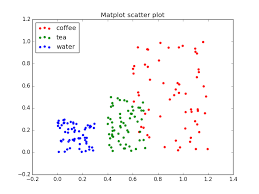

In [14]:
# plot X showing the classes hold in y
# import matplotlib.pyplot as plt
# df.plot.scatter(x='Age' y='Outcome')
# plt.scatter()

## Fit the model

In [6]:
knn = KNN(k=5)
model = knn.fit(X_train, y_train)

In [7]:
assert model is not None and type(model) == KNN, 'Fit method should return itself'

## Predict the classes for the same data

In [9]:
y_pred = knn.predict(X_test, dist_type='Euclidean')

In [10]:
accuracy = knn.accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")
unique, matrix = knn.confusion_matrix(y_test, y_pred)
recall, precision, F1_score = knn.recall_precision_calc(matrix)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {F1_score}")


Accuracy: 74.89177489177489
Unique prediction values:
(P)0 1
(A)---
Confusion Matrix:
0| 134 23
1| 35 39
Recall: 0.6290322580645161
Precision: 0.527027027027027
F1-score: 0.5735294117647058


## Show the decission boundaries depending on K for your model
example
<img src="https://i.stack.imgur.com/ZDVhm.png" width="300"/>
(tricky one so we are going to help you out with this one)

In [43]:
from ipywidgets import interact
import matplotlib.pyplot as plt
@interact
def plot_decision_boundary(k=(1,10,1)):
    X = df[['Age', 'BMI']].values
    y= df['Outcome'].values
    knn = KNN(k=k)
    model = knn.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()], 'Euclidean')
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z)

    for c in set(y):
        plt.scatter(*X[y==c].T)

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

# Repeat this process with Dataset 2 and Dataset 3

In [22]:
from sklearn import datasets
data_iris = datasets.load_iris()
print(f"data.keys() :{data_iris.keys()}")
df = pd.DataFrame(data_iris.data)
df.columns = data_iris.feature_names
df['target'] = data_iris.target
df['class'] = df['target'].apply(lambda x: data_iris['target_names'][x])

data.keys() :dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [23]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa


In [24]:
X = df.drop(['target', 'class'], axis=1).values
y = df['target'].values

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test, dist_type='Euclidean')


In [25]:
accuracy = knn.accuracy(y_test, y_pred)
print(f"Accuracy: {round(accuracy,2)} %")
unique, matrix = knn.confusion_matrix(y_test, y_pred)
recall, precision, F1_score = knn.recall_precision_calc(matrix)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {F1_score}")

Accuracy: 97.78 %
Unique prediction values:
(P)0 1 2
(A)---
Confusion Matrix:
0| 16 0 0
1| 0 17 1
2| 0 0 11
Recall: 0.9166666666666666
Precision: 1.0
F1-score: 0.9565217391304348
